In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read the data set using read_csv

In [48]:
df = pd.read_csv('/content/Linear Regression - Sheet1.csv')

## Check the data points in the dataset

In [49]:
print(df.head())

   X         Y
0  1  3.888889
1  2  4.555556
2  3  5.222222
3  4  5.888889
4  5  6.555556


In [50]:
df.shape

(300, 2)

In [51]:
df.isnull().sum()

X    0
Y    0
dtype: int64

##Visualize the data set

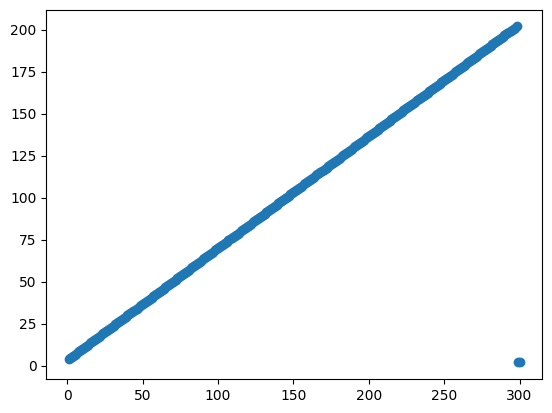

In [53]:
plt.scatter(df['X'], df['Y'])
plt.show()

In [54]:
print(df.corr())

          X         Y
X  1.000000  0.959876
Y  0.959876  1.000000


In [55]:
import seaborn as sns

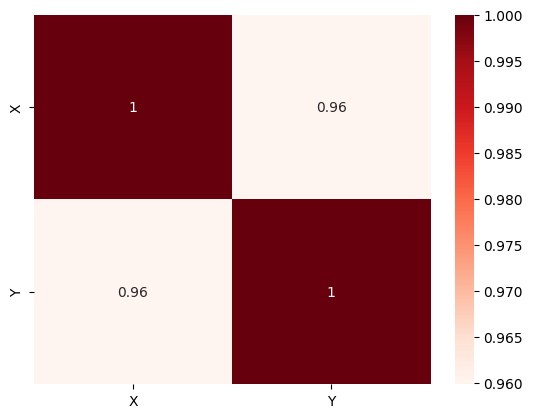

In [56]:
sns.heatmap(df[['X','Y']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [57]:
print(df.describe())

                X           Y
count  300.000000  300.000000
mean   150.500000  102.215556
std     86.746758   57.842711
min      1.000000    1.888889
25%     75.750000   52.388889
50%    150.500000  102.222222
75%    225.250000  152.055556
max    300.000000  201.888889


## Simple Linear Regression

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
One variable, **denoted x** , is regarded as the **predictor, explanatory, or independent variable**.
The other variable, **denoted y**, is regarded as **the response, outcome, or dependent variable.**



In [58]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [59]:
print('X shape:', X.shape)
print('y shape:', y.shape)
print('X shape type:', type(X))
print('y shape type:', type(y))

X shape: (300, 1)
y shape: (300,)
X shape type: <class 'pandas.core.frame.DataFrame'>
y shape type: <class 'pandas.core.series.Series'>


In [60]:
#Wrong Approach 
X_wrong = df.iloc[:,-1]
y_wrong = df.iloc[:,-1]

In [61]:
print('X_wrong shape:', X_wrong.shape , type(X_wrong) )
print('y_wrong shape:', y_wrong.shape , type(y_wrong))

X_wrong shape: (300,) <class 'pandas.core.series.Series'>
y_wrong shape: (300,) <class 'pandas.core.series.Series'>


##Split the data into train and test

We could already feed our X and y data directly to our linear regression model, but if we use all of our data at once, how can we know if our results are any good? Just like in learning, what we will do, is use a part of the data to train our model and another part of it, to test it

This is easily achieved through the helper **train_test_split()** method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size.

train_test_split() helper method from from ***sklearn.model_selection import train_test_split***
  
test_size is the percentage of the overall data we'll be using for testing

 Some common train-test splits are  80/20 and 70/30.

 random_state = SEED = Some Number(42) = Splitting data into training/validation/test sets: random seeds ensure that the data is divided the same way every time the code is run



In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [63]:
print(X_train)

       X
232  233
59    60
6      7
185  186
173  174
..   ...
188  189
71    72
106  107
270  271
102  103

[240 rows x 1 columns]


In [64]:
print(y_train)

232    158.555556
59      43.222222
6        7.888889
185    127.222222
173    119.222222
          ...    
188    129.222222
71      51.222222
106     74.555556
270    183.888889
102     71.888889
Name: Y, Length: 240, dtype: float64


##Training a Linear Regression Model

our train and test sets ready. Scikit-Learn has a various model types we can easily import and train

need to fit the line to our data, we will do that by using the **.fit()** method along with our X_train and y_train data

You can inspect the intercept and slope by printing the **regressor.intecept_**  and **regressor.coef_** attributes

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
regressor.intercept_

6.585440426796296

In [67]:
regressor.coef_

array([0.6331428])

In [68]:
print(regressor.coef_[0])

0.6331427994224927


##Making Predictions

our own formula that calculates the value or  call on the **predict()** function

In [69]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [70]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[12.60029702]


In [71]:
score = regressor.predict([[9.5]])
print(score)

[12.60029702]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
y_pred = regressor.predict(X_test)

In [73]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)

         Actual   Predicted
203  139.222222  135.746572
266  181.222222  175.634568
152  105.222222  103.456289
9      9.888889   12.916868
233  159.222222  154.740855
226  154.555556  150.308856
196  134.555556  131.314572
109   76.555556   76.231148
5      7.222222   10.384297
175  120.555556  118.018573
237  161.888889  157.273427
57    41.888889   43.307723
218  149.222222  145.243714
45    33.888889   35.710009
182  125.222222  122.450573
221  151.222222  147.143142
289  196.555556  190.196852
211  144.555556  140.811714
148  102.555556  100.923718
165  113.888889  111.687145
78    55.888889   56.603722
113   79.222222   78.763720
249  169.888889  164.871140
250  170.555556  165.504283
104   73.222222   73.065434
42    31.888889   33.810581
281  191.222222  185.131710
295  200.555556  193.995709
157  108.555556  106.622003
238  162.555556  157.906569
17    15.222222   17.982011
164  113.222222  111.054002
33    25.888889   28.112296
24    19.888889   22.414010
215  147.222222  143

##Visualize the Actual Vs Predicted

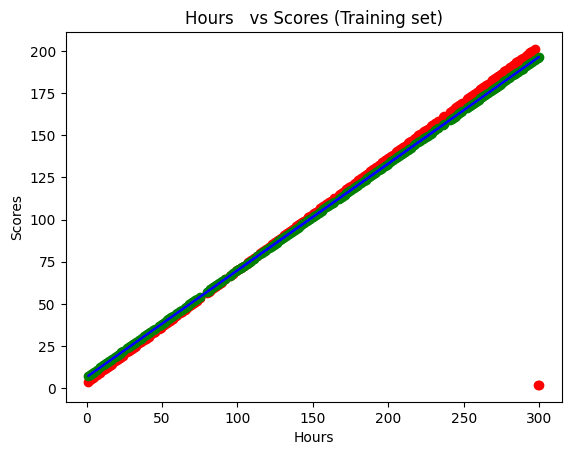

In [74]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.scatter(X_train, regressor.predict(X_train), color = 'green')
plt.title('Hours   vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

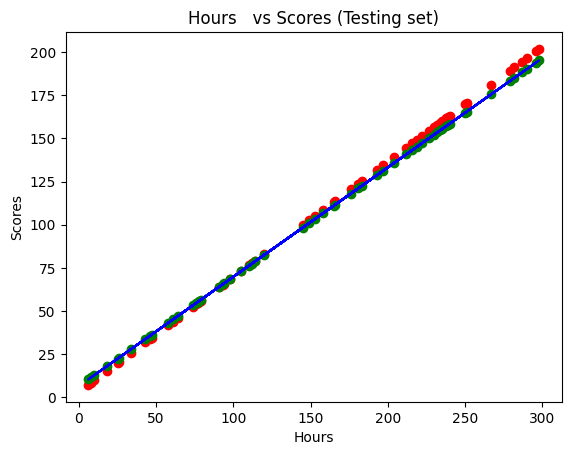

In [75]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.scatter(X_test, regressor.predict(X_test), color = 'green')
plt.title('Hours   vs Scores (Testing set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##Evaluating the Model


Using from sklearn.metrics import mean_absolute_error, mean_squared_error


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred) #r2 *100 = accuracy

print(mae)
print(mse)
print(rmse)
print(r2)

2.8293196617609206
11.554304857221346
3.3991623758245715
0.996613741998755
